# Cluster data

## Preamble

Load packages and dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [4]:
import src
from src import *

In [5]:
data = datasets.data_original()
data.shape


(2139, 23)

In [6]:
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


### Drop categorical features

In [10]:
continuous_features = [col for col in data.columns if data[col].nunique() > 4]
continuous_features

df = data[continuous_features]

### Scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = scaler.fit_transform(df)

## Kmeans with two clusters

In [21]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

In [22]:
kmeans.cluster_centers_


array([[0.83718525, 0.40378791, 0.34225763, 0.12952289, 0.30406194,
        0.32851933, 0.18843281, 0.13743734],
       [0.34132813, 0.39218602, 0.34210028, 0.14315981, 0.25800859,
        0.22138215, 0.19627122, 0.13675855]])

In [31]:
a = list(continuous_features) + list(kmeans.cluster_centers_)
a

['time',
 'age',
 'wtkg',
 'preanti',
 'cd40',
 'cd420',
 'cd80',
 'cd820',
 array([0.83718525, 0.40378791, 0.34225763, 0.12952289, 0.30406194,
        0.32851933, 0.18843281, 0.13743734]),
 array([0.34132813, 0.39218602, 0.34210028, 0.14315981, 0.25800859,
        0.22138215, 0.19627122, 0.13675855])]

## Select k with the elbow method

https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init_

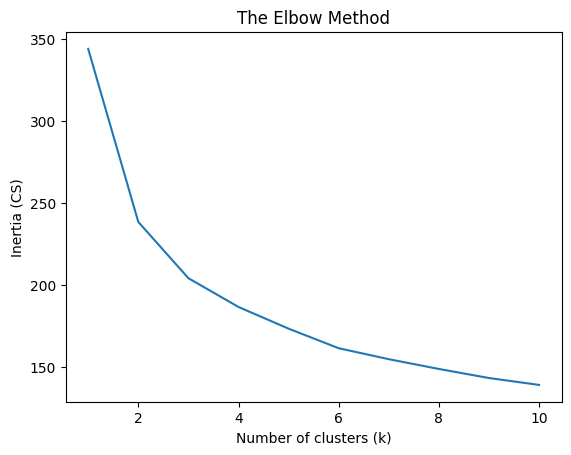

In [20]:
from sklearn.cluster import KMeans
cs = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (CS)')
plt.show()